In [2]:
# sudo apt-get update
# !sudo apt install python-opengl
# !sudo apt install ffmpeg
# !sudo apt install xvfb
!pip3 install pyvirtualdisplay

# Virtual display
from pyvirtualdisplay import Display

virtual_display = Display(visible=0, size=(1400, 900))
virtual_display.start()

In [3]:
!pip install gym[box2d]
!pip install stable-baselines3[extra]
!pip install huggingface_sb3
!pip install pyglet
!pip install ale-py==0.7.4 # To overcome an issue with gym (https://github.com/DLR-RM/stable-baselines3/issues/875)

!pip install pickle5

In [4]:
import gym

from huggingface_sb3 import load_from_hub, package_to_hub, push_to_hub
from huggingface_hub import notebook_login # To log to our Hugging Face account to be able to upload models to the Hub.

from stable_baselines3 import PPO
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.env_util import make_vec_env

In [5]:
import gym
env = gym.make("LunarLander-v2")


In [6]:

import gym

# First, we create our environment called LunarLander-v2
env = gym.make("LunarLander-v2")

# Then we reset this environment
observation = env.reset()

for _ in range(20):
  # Take a random action
  action = env.action_space.sample()
  print("Action taken:", action)

  # Do this action in the environment and get
  # next_state, reward, done and info
  observation, reward, done, info = env.step(action)
  
  # If the game is done (in our case we land, crashed or timeout)
  if done:
      # Reset the environment
      print("Environment is reset")
      observation = env.reset()

Action taken: 1
Action taken: 1
Action taken: 2
Action taken: 2
Action taken: 3
Action taken: 1
Action taken: 2
Action taken: 3
Action taken: 1
Action taken: 1
Action taken: 1
Action taken: 2
Action taken: 0
Action taken: 3
Action taken: 1
Action taken: 1
Action taken: 0
Action taken: 3
Action taken: 1
Action taken: 2


In [7]:
# We create our environment with gym.make("<name_of_the_environment>")
env = gym.make("LunarLander-v2")
env.reset()
print("_____OBSERVATION SPACE_____ \n")
print("Observation Space Shape", env.observation_space.shape)
print("Sample observation", env.observation_space.sample()) # Get a random observation

_____OBSERVATION SPACE_____ 

Observation Space Shape (8,)
Sample observation [ 1.8137981  -1.1013103  -0.7936897  -0.20797868 -0.5319104  -0.5926793
 -0.25880367 -0.8773885 ]


In [8]:
print("\n _____ACTION SPACE_____ \n")
print("Action Space Shape", env.action_space.n)
print("Action Space Sample", env.action_space.sample()) # Take a random action


 _____ACTION SPACE_____ 

Action Space Shape 4
Action Space Sample 0


In [9]:
# Create the environment
env = make_vec_env('LunarLander-v2', n_envs=16)

In [10]:
# SOLUTION
# We added some parameters to accelerate the training
model = PPO(
    policy = 'MlpPolicy',
    env = env,
    n_steps = 1024,
    batch_size = 64,
    n_epochs = 4,
    gamma = 0.999,
    gae_lambda = 0.98,
    ent_coef = 0.01,
    verbose=1)

Using cuda device


#### Solution

In [11]:
# SOLUTION
# Train it for 500,000 timesteps
# hello..
model.learn(total_timesteps=500000)
# Save the model
model_name = "ppo-LunarLander-v2"
model.save(model_name) # Ooo, puts the weights inside of a zip file

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 90.2     |
|    ep_rew_mean     | -192     |
| time/              |          |
|    fps             | 5231     |
|    iterations      | 1        |
|    time_elapsed    | 3        |
|    total_timesteps | 16384    |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 95.2        |
|    ep_rew_mean          | -145        |
| time/                   |             |
|    fps                  | 3181        |
|    iterations           | 2           |
|    time_elapsed         | 10          |
|    total_timesteps      | 32768       |
| train/                  |             |
|    approx_kl            | 0.006635431 |
|    clip_fraction        | 0.0571      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.38       |
|    explained_variance   | -0.000418   |
|    learning_rate        | 0.

### Step 7: Evaluate the agent 📈
- Now that our Lunar Lander agent is trained 🚀, we need to **check its performance**.
- Stable-Baselines3 provides a method to do that: `evaluate_policy`.
- To fill that part you need to [check the documentation](https://stable-baselines3.readthedocs.io/en/master/guide/examples.html#basic-usage-training-saving-loading)
- In the next step,  we'll see **how to automatically evaluate and share your agent to compete in a leaderboard, but for now let's do it ourselves**


💡 When you evaluate your agent, you should not use your training environment but create an evaluation environment.

In [12]:
#@title
eval_env = gym.make("LunarLander-v2")
mean_reward, std_reward = evaluate_policy(model, eval_env, n_eval_episodes=10, deterministic=True)
print(f"mean_reward={mean_reward:.2f} +/- {std_reward}")

/home/mighty/anaconda3/envs/test1/lib/python3.9/site-packages/stable_baselines3/common/evaluation.py:65: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


mean_reward=168.22 +/- 58.05726642262943


- In my case, I got a mean reward is `200.20 +/- 20.80` after training for 1 million steps, which means that our lunar lander agent is ready to land on the moon 🌛🥳.

### Step 8: Publish our trained model on the Hub 🔥
Now that we saw we got good results after the training, we can publish our trained model on the hub 🤗 with one line of code.

📚 The libraries documentation 👉 https://github.com/huggingface/huggingface_sb3/tree/main#hugging-face--x-stable-baselines3-v20

Here's an example of a Model Card (with Space Invaders):

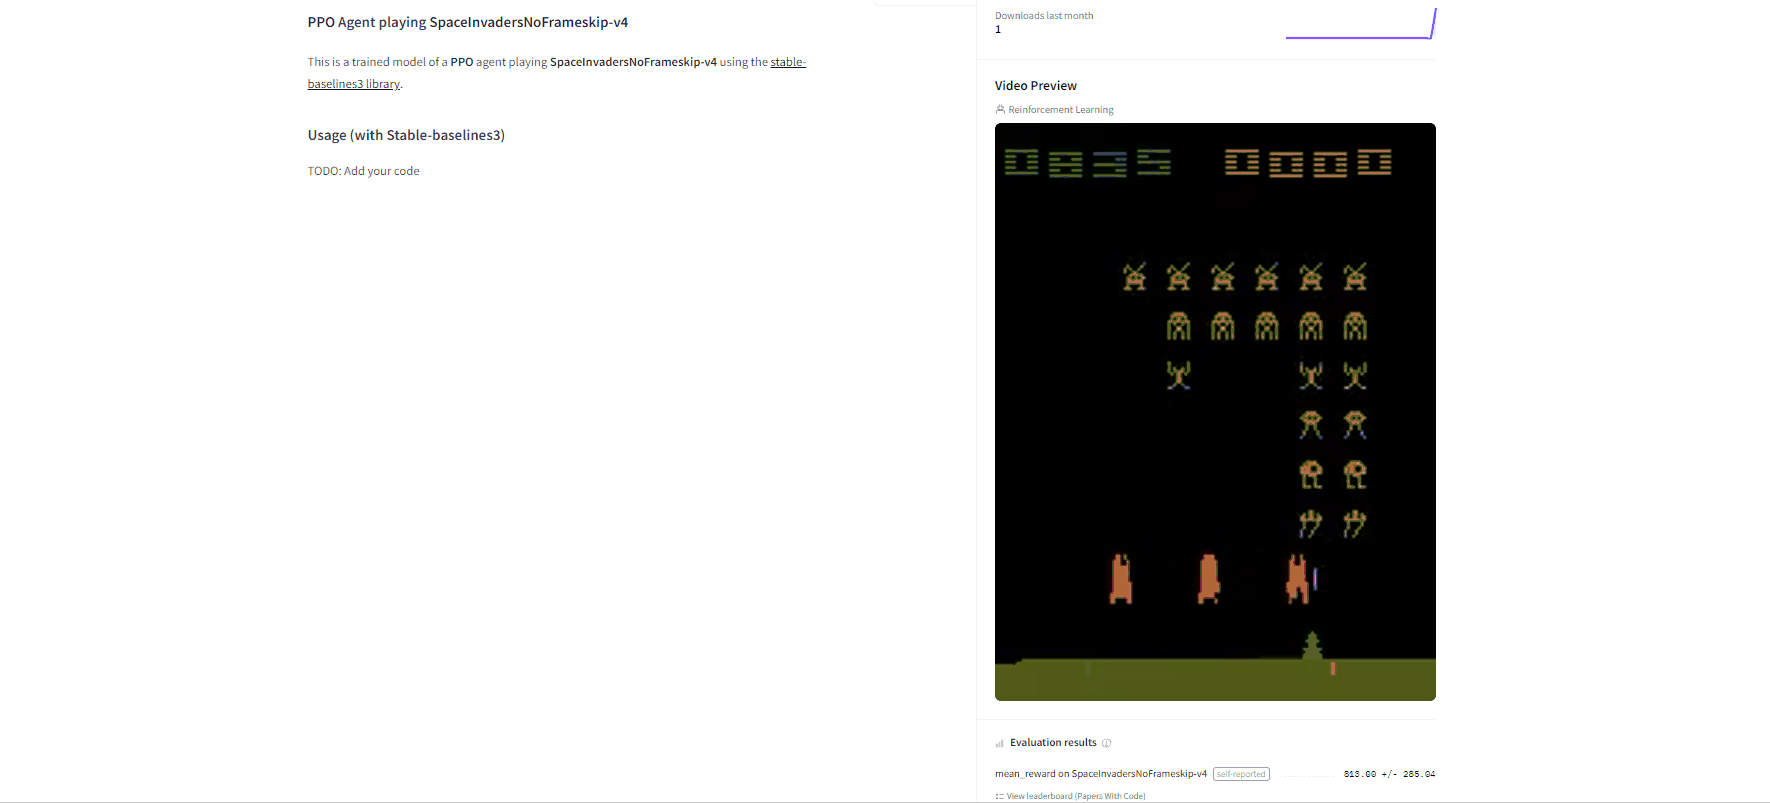

By using `package_to_hub` **you evaluate, record a replay, generate a model card of your agent and push it to the hub**.

---
The package_to_hub function
---

This way:
- You can **showcase our work** 🔥
- You can **visualize your agent playing** 👀
- You can **share with the community an agent that others can use** 💾
- You can **access a leaderboard 🏆 to see how well your agent is performing compared to your classmates** 👉 https://huggingface.co/spaces/huggingface-projects/Deep-Reinforcement-Learning-Leaderboard


To be able to share your model with the community there are three more steps to follow:

1️⃣ (If it's not already done) create an account to HF ➡ https://huggingface.co/join

2️⃣ Sign in and then, you need to store your authentication token from the Hugging Face website.
- Create a new token (https://huggingface.co/settings/tokens) **with write role**

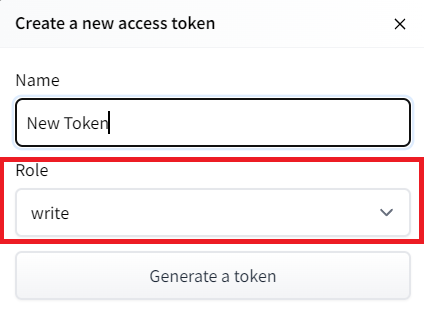

- Copy the token 
- Run the cell below and paste the token

In [13]:
notebook_login()
!git config --global credential.helper store

If you don't want to use a Google Colab or a Jupyter Notebook, you need to use this command instead: `huggingface-cli login`

3️⃣ We're now ready to push our trained agent to the 🤗 Hub 🔥 using `package_to_hub()` function

Let's fill the `package_to_hub` function:
- `model`: our trained model.
- `model_name`: the name of the trained model that we defined in `model_save`
- `model_architecture`: the model architecture we used: in our case PPO
- `env_id`: the name of the environment, in our case `LunarLander-v2`
- `eval_env`: the evaluation environment defined in eval_env
- `repo_id`: the name of the Hugging Face Hub Repository that will be created/updated `(repo_id = {username}/{repo_name})`

💡 **A good name is {username}/{model_architecture}-{env_id}**

- `commit_message`: message of the commit

In [14]:
import gym
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.env_util import make_vec_env

from huggingface_sb3 import package_to_hub

## TODO: Define a repo_id
## repo_id is the id of the model repository from the Hugging Face Hub (repo_id = {organization}/{repo_name} for instance ThomasSimonini/ppo-LunarLander-v2
repo_id = 

# TODO: Define the name of the environment
env_id = 

# Create the evaluation env
eval_env = DummyVecEnv([lambda: gym.make(env_id)])


# TODO: Define the model architecture we used
model_architecture = ""

## TODO: Define the commit message
commit_message = ""

# method save, evaluate, generate a model card and record a replay video of your agent before pushing the repo to the hub
package_to_hub(model=model, # Our trained model
               model_name=model_name, # The name of our trained model 
               model_architecture=model_architecture, # The model architecture we used: in our case PPO
               env_id=env_id, # Name of the environment
               eval_env=eval_env, # Evaluation Environment
               repo_id=repo_id, # id of the model repository from the Hugging Face Hub (repo_id = {organization}/{repo_name} for instance ThomasSimonini/ppo-LunarLander-v2
               commit_message=commit_message)

# Note: if after running the package_to_hub function and it gives an issue of rebasing, please run the following code
# cd <path_to_repo> && git add . && git commit -m "Add message" && git pull 
# And don't forget to do a "git push" at the end to push the change to the hub.

SyntaxError: invalid syntax (906498730.py, line 9)

#### Solution


In [ ]:
import gym

from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.env_util import make_vec_env

from huggingface_sb3 import package_to_hub

# PLACE the variables you've just defined two cells above
# Define the name of the environment
env_id = "LunarLander-v2"

# TODO: Define the model architecture we used
model_architecture = "PPO"

## Define a repo_id
## repo_id is the id of the model repository from the Hugging Face Hub (repo_id = {organization}/{repo_name} for instance ThomasSimonini/ppo-LunarLander-v2
## CHANGE WITH YOUR REPO ID
repo_id = "ThomasSimonini/ppo-LunarLander-v2"

## Define the commit message
commit_message = "Upload PPO LunarLander-v2 trained agent"

# Create the evaluation env
eval_env = DummyVecEnv([lambda: gym.make(env_id)])

# PLACE the package_to_hub function you've just filled here
package_to_hub(model=model, # Our trained model
               model_name=model_name, # The name of our trained model 
               model_architecture=model_architecture, # The model architecture we used: in our case PPO
               env_id=env_id, # Name of the environment
               eval_env=eval_env, # Evaluation Environment
               repo_id=repo_id, # id of the model repository from the Hugging Face Hub (repo_id = {organization}/{repo_name} for instance ThomasSimonini/ppo-LunarLander-v2
               commit_message=commit_message)


Congrats 🥳 you've just trained and uploaded your first Deep Reinforcement Learning agent. The script above should have displayed a link to a model repository such as https://huggingface.co/osanseviero/test_sb3. When you go to this link, you can:
* see a video preview of your agent at the right. 
* click "Files and versions" to see all the files in the repository.
* click "Use in stable-baselines3" to get a code snippet that shows how to load the model.
* a model card (`README.md` file) which gives a description of the model

Under the hood, the Hub uses git-based repositories (don't worry if you don't know what git is), which means you can update the model with new versions as you experiment and improve your agent.

Compare the results of your LunarLander-v2 with your classmates using the leaderboard 🏆 👉 https://huggingface.co/spaces/huggingface-projects/Deep-Reinforcement-Learning-Leaderboard

### Step 9: Load a saved LunarLander model from the Hub 🤗
Thanks to [ironbar](https://github.com/ironbar) for the contribution.

Loading a saved model from the Hub is really easy. 

You go https://huggingface.co/models?library=stable-baselines3 to see the list of all the Stable-baselines3 saved models.
1. You select one and copy its repo_id

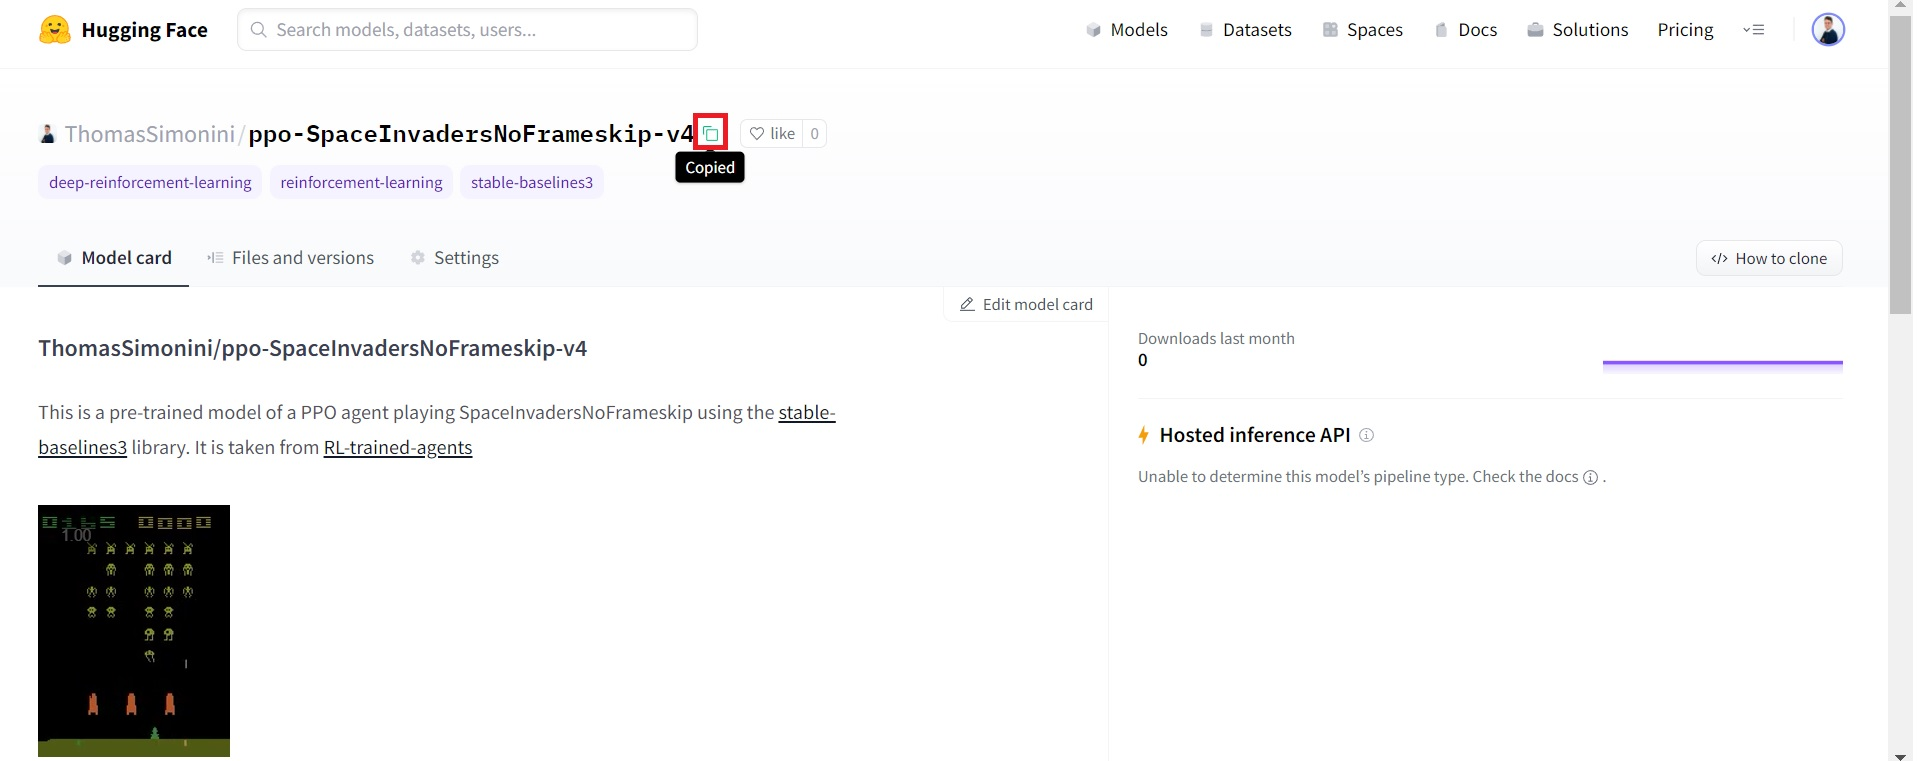

2. Then we just need to use load_from_hub with:
- The repo_id
- The filename: the saved model inside the repo and its extension (*.zip)

In [ ]:
from huggingface_sb3 import load_from_hub
repo_id = "" # The repo_id
filename = "" # The model filename.zip

# When the model was trained on Python 3.8 the pickle protocol is 5
# But Python 3.6, 3.7 use protocol 4
# In order to get compatibility we need to:
# 1. Install pickle5 (we done it at the beginning of the colab)
# 2. Create a custom empty object we pass as parameter to PPO.load()
custom_objects = {
            "learning_rate": 0.0,
            "lr_schedule": lambda _: 0.0,
            "clip_range": lambda _: 0.0,
}

checkpoint = load_from_hub(repo_id, filename)
model = PPO.load(checkpoint, custom_objects=custom_objects, print_system_info=True)

# Evaluate this model
eval_env = gym.make("LunarLander-v2")
mean_reward, std_reward = evaluate_policy(model, eval_env, n_eval_episodes=10, deterministic=True)
print(f"mean_reward={mean_reward:.2f} +/- {std_reward}")

Let's watch our agent performing 🎥 (Google Colab only) 👀
We're going to use [colabgymrender package by Ryan Rudes](https://github.com/ryanrudes) that records our agent performing in the environment and outputs a video.

In [ ]:
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
!pip install -U colabgymrender

If you have a runtime bug `RuntimeError: imageio.ffmpeg.download() has been deprecated. Use 'pip install imageio-ffmpeg' instead.'` here please install this package and click on restart button after the installation

In [ ]:
!pip install imageio==2.4.1

In [ ]:
from colabgymrender.recorder import Recorder

directory = './video'
env = Recorder(eval_env, directory)

obs = env.reset()
done = False
while not done:
  action, _state = model.predict(obs)
  obs, reward, done, info = env.step(action)
env.play()

## Some additional challenges 🏆
The best way to learn **is to try things by your own**! As you saw, the current agent is not doing great. As a first suggestion, you can train for more steps. With 1,000,000 steps, we saw some great results! 

In the [Leaderboard](https://huggingface.co/spaces/huggingface-projects/Deep-Reinforcement-Learning-Leaderboard) you will find your agents. Can you get to the top?

Here are some ideas to achieve so:
* Train more steps
* Try different hyperparameters of `PPO`. You can see them at https://stable-baselines3.readthedocs.io/en/master/modules/ppo.html#parameters. 
* Check the [Stable-Baselines3 documentation](https://stable-baselines3.readthedocs.io/en/master/modules/dqn.html) and try another models such as DQN.
* **Push your new trained model** on the Hub 🔥

**Compare the results of your LunarLander-v2 with your classmates** using the [leaderboard](https://huggingface.co/spaces/huggingface-projects/Deep-Reinforcement-Learning-Leaderboard) 🏆

Is moon landing too boring to you? Try to **change the environment**, why not using CartPole-v1, MountainCar-v0 or CarRacing-v0? Check how they works [using the gym documentation](https://www.gymlibrary.ml/) and have fun 🎉.

________________________________________________________________________
Congrats on finishing this chapter! That was the biggest one, **and there was a lot of information.**

If you’re still feel confused with all these elements...it's totally normal! **This was the same for me and for all people who studied RL.**

Take time to really **grasp the material before continuing and try the additional challenges**. It’s important to master these elements and having a solid foundations.

Naturally, during the course, we’re going to use and deeper explain again these terms but **it’s better to have a good understanding of them now before diving into the next chapters.**




### This is a course built with you 👷🏿‍♀️

We want to improve and update the course iteratively with your feedback. If you have some, please fill this form 👉 https://forms.gle/3HgA7bEHwAmmLfwh9

If you found some issues in this notebook, please [open an issue on the Github Repo](https://github.com/huggingface/deep-rl-class/issues).




See you on [Unit 2](https://github.com/huggingface/deep-rl-class/tree/main/unit2#unit-2-introduction-to-q-learning)! 🔥
## Keep learning, stay awesome 🤗